## **CNN with MNIST Data**

In [1]:
import pandas as pd
import seaborn as sns
import tensorflow as tf                       
import numpy as np                           
import matplotlib.pyplot as plt               
%matplotlib inline

In [2]:
from tensorflow.keras.datasets.mnist import load_data    # To load the MNIST digit dataset

(X_train, y_train) , (X_test, y_test) = load_data()      # Loading data

11493376/11490434 [==============================] - 3s 0us/step


In [3]:
print("There are ", len(X_train), "images in the training dataset")     
print("There are ", len(X_test), "images in the test dataset")   

There are  60000 images in the training dataset
There are  10000 images in the test dataset


In [4]:
# Checking the shape of one image
X_train[8].shape

(28, 28)

In [5]:
X_train[8]

array([[  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   5,
         63, 197,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  

In [6]:
X_train[8].shape

(28, 28)

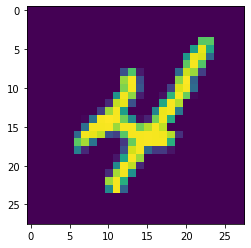

In [7]:
plt.imshow(X_train[9])
# plt.matshow(X_train[5])

In [8]:
y_train[9]

4

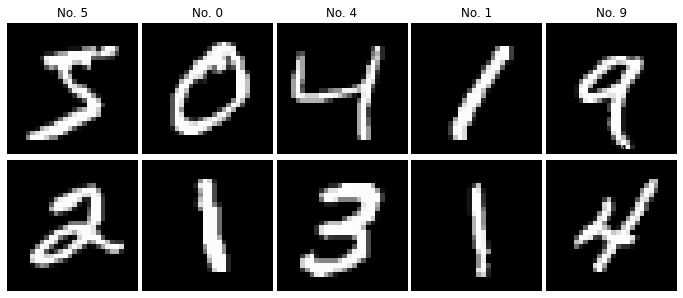

In [9]:
num_rows, num_cols = 2, 5
f, ax = plt.subplots(2, 5, figsize=(12,5),
                     gridspec_kw={'wspace':0.03, 'hspace':0.02}, 
                     squeeze=True)

for r in range(num_rows):
    for c in range(num_cols):
      
        image_index = r * 5 + c
        ax[r,c].axis("off")
        ax[r,c].imshow( X_train[image_index], cmap='gray')
        ax[r,c].set_title('No. %d' % y_train[image_index])
plt.show()
plt.close()

## Data Preprocessing

In [10]:
X_train[9].min()

0

In [11]:
X_train[9].max()

255

In [12]:
#we scale the data
X_train = X_train.astype('float32')
X_test = X_test.astype('float32')
X_train /= 255
X_test /= 255

In [13]:
X_train[9].min()

0.0

In [14]:
X_train[9].max()

1.0

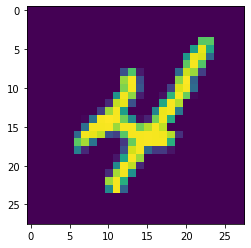

In [15]:
plt.imshow(X_train[9])

In [16]:
X_train = X_train.reshape(X_train.shape[0],28, 28, 1) 
X_test = X_test.reshape(X_test.shape[0], 28, 28, 1)

In [17]:
X_train.shape, X_test.shape

((60000, 28, 28, 1), (10000, 28, 28, 1))

In [18]:
y_train

array([5, 0, 4, ..., 5, 6, 8], dtype=uint8)

In [19]:
from tensorflow.keras.utils import to_categorical

In [20]:
# we convert numbers to category variable.
Y_train = to_categorical(y_train, 10) 
Y_test = to_categorical(y_test, 10)
Y_test.shape

(10000, 10)

In [21]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Conv2D, MaxPool2D, Flatten

In [22]:
model = Sequential()

model.add(Conv2D(filters=32, kernel_size=(3,3),input_shape=(28, 28, 1), activation='relu'))

model.add(MaxPool2D(pool_size=(2, 2))) # reducing size

model.add(Flatten())

model.add(Dense(128, activation='relu'))

model.add(Dense(10, activation='softmax'))

model.compile(loss='categorical_crossentropy',
              optimizer='adam',
              metrics=['accuracy'])

**A sample example showing the conversion of 3D data to 2D**
![3Dto2D](https://dphi-courses.s3.ap-south-1.amazonaws.com/Deep+Learning+Bootcamp/3D+to++2D.png)

In [23]:
model.summary() # I can view the summary because I specified the input shape

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d (Conv2D)              (None, 26, 26, 32)        320       
_________________________________________________________________
max_pooling2d (MaxPooling2D) (None, 13, 13, 32)        0         
_________________________________________________________________
flatten (Flatten)            (None, 5408)              0         
_________________________________________________________________
dense (Dense)                (None, 128)               692352    
_________________________________________________________________
dense_1 (Dense)              (None, 10)                1290      
Total params: 693,962
Trainable params: 693,962
Non-trainable params: 0
_________________________________________________________________


In [24]:
from tensorflow.keras.callbacks import EarlyStopping

In [25]:
early_stop = EarlyStopping(monitor='val_loss',patience=2)

In [26]:
model.fit(X_train, Y_train, batch_size=32, epochs=10, validation_data=(X_test,Y_test),callbacks=[early_stop])


Epoch 1/10
1875/1875 [==============================] - 36s 19ms/step - loss: 0.1609 - accuracy: 0.9513 - val_loss: 0.0651 - val_accuracy: 0.9788
Epoch 2/10
1875/1875 [==============================] - 39s 21ms/step - loss: 0.0538 - accuracy: 0.9835 - val_loss: 0.0519 - val_accuracy: 0.9825
Epoch 3/10
1875/1875 [==============================] - 38s 21ms/step - loss: 0.0333 - accuracy: 0.9898 - val_loss: 0.0520 - val_accuracy: 0.9837
Epoch 4/10
1875/1875 [==============================] - 38s 20ms/step - loss: 0.0222 - accuracy: 0.9930 - val_loss: 0.0437 - val_accuracy: 0.9857
Epoch 5/10
1875/1875 [==============================] - 38s 20ms/step - loss: 0.0151 - accuracy: 0.9950 - val_loss: 0.0479 - val_accuracy: 0.9855
Epoch 6/10
1875/1875 [==============================] - 38s 20ms/step - loss: 0.0119 - accuracy: 0.9962 - val_loss: 0.0441 - val_accuracy: 0.9868


In [27]:
model.metrics_names

['loss', 'accuracy']

In [28]:
model.history.history

{'loss': [0.1609385460615158,
  0.05380060896277428,
  0.03326158970594406,
  0.022249871864914894,
  0.015136126428842545,
  0.011930033564567566],
 'accuracy': [0.9513333439826965,
  0.9834666848182678,
  0.9898499846458435,
  0.9930333495140076,
  0.995033323764801,
  0.9962000250816345],
 'val_loss': [0.06514106690883636,
  0.05191995948553085,
  0.051993366330862045,
  0.0437469556927681,
  0.04793012514710426,
  0.0441344790160656],
 'val_accuracy': [0.9787999987602234,
  0.9825000166893005,
  0.9836999773979187,
  0.9857000112533569,
  0.9854999780654907,
  0.9868000149726868]}

In [29]:
summary = pd.DataFrame(model.history.history)
summary.head()

,loss,accuracy,val_loss,val_accuracy
0,0.160939,0.951333,0.065141,0.9788
1,0.053801,0.983467,0.051920,0.9825
2,0.033262,0.989850,0.051993,0.9837
3,0.022250,0.993033,0.043747,0.9857
4,0.015136,0.995033,0.047930,0.9855


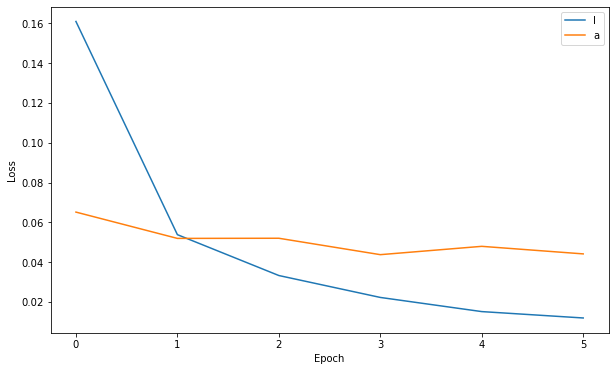

In [30]:
plt.figure(figsize=(10,6))
plt.plot(summary.loss)
plt.plot(summary.val_loss)
plt.ylabel("Loss")
plt.xlabel("Epoch")
plt.legend('labels')

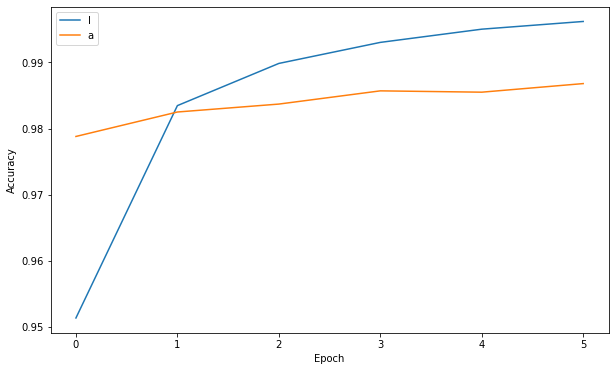

In [31]:
plt.figure(figsize=(10,6))
plt.plot(summary.accuracy)
plt.plot(summary.val_accuracy)
plt.ylabel("Accuracy")
plt.xlabel("Epoch")
plt.legend('labels');

In [32]:
print(model.evaluate(X_test,Y_test,verbose=1))

313/313 [==============================] - 2s 6ms/step - loss: 0.0441 - accuracy: 0.9868
[0.0441344790160656, 0.9868000149726868]


In [33]:
from sklearn.metrics import classification_report,confusion_matrix

In [34]:
preds = model.predict(X_test)
preds

array([[3.2273284e-09, 1.1267658e-07, 1.8734690e-08, ..., 9.9999785e-01,
        1.4956640e-08, 1.0007503e-06],
       [4.1250014e-11, 3.1162932e-07, 9.9999964e-01, ..., 6.6331665e-14,
        4.8344657e-12, 6.3213290e-14],
       [1.2590280e-08, 9.9999547e-01, 2.6590368e-07, ..., 1.3579690e-06,
        3.2375954e-07, 3.7205847e-10],
       ...,
       [6.7182202e-15, 6.7847200e-11, 5.2629254e-14, ..., 8.5379293e-10,
        2.2809811e-08, 4.8100937e-08],
       [2.5448981e-12, 1.0785172e-16, 1.1669433e-15, ..., 3.8202385e-14,
        5.4242435e-07, 8.6212379e-13],
       [5.0958265e-11, 3.4575665e-10, 8.6072857e-11, ..., 9.1728545e-13,
        9.2686481e-10, 4.1421150e-13]], dtype=float32)

In [35]:
preds[0]

array([3.2273284e-09, 1.1267658e-07, 1.8734690e-08, 1.0140003e-06,
       9.2463672e-09, 8.5399181e-09, 3.0343495e-14, 9.9999785e-01,
       1.4956640e-08, 1.0007503e-06], dtype=float32)

In [36]:
predictions= np.argmax(preds, axis=1)

In [37]:
len(predictions)

10000

In [38]:
predictions

array([7, 2, 1, ..., 4, 5, 6], dtype=int64)

In [39]:
print(classification_report(y_test, predictions))

              precision    recall  f1-score   support

           0       0.99      0.99      0.99       980
           1       0.99      1.00      0.99      1135
           2       0.99      0.99      0.99      1032
           3       0.99      0.99      0.99      1010
           4       0.99      0.99      0.99       982
           5       0.97      0.99      0.98       892
           6       0.99      0.98      0.98       958
           7       0.99      0.99      0.99      1028
           8       0.99      0.98      0.98       974
           9       0.99      0.98      0.98      1009

    accuracy                           0.99     10000
   macro avg       0.99      0.99      0.99     10000
weighted avg       0.99      0.99      0.99     10000



In [40]:
print(confusion_matrix(y_test, predictions))

[[ 971    0    3    0    0    2    3    0    0    1]
 [   0 1131    0    0    0    1    2    1    0    0]
 [   0    4 1019    0    1    0    1    6    1    0]
 [   0    0    2 1000    0    6    0    1    1    0]
 [   0    1    1    0  968    0    4    0    3    5]
 [   1    0    0    7    0  882    2    0    0    0]
 [   5    2    0    1    2    6  939    0    3    0]
 [   0    1    3    0    0    0    0 1021    1    2]
 [   4    1    3    5    0    3    0    2  950    6]
 [   0    1    0    2    5    8    0    4    2  987]]


In [41]:
score = model.evaluate(X_test, Y_test, verbose=0)
print('Test loss:', score[0])
print('Test accuracy:', score[1])

Test loss: 0.0441344790160656
Test accuracy: 0.9868000149726868


In [42]:
my_number = X_test[5]

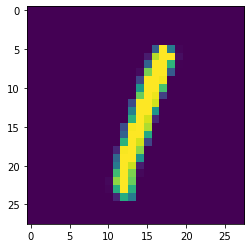

In [43]:
plt.imshow(my_number.reshape(28,28));

In [44]:
model.predict(my_number.reshape(1,28,28,1))

array([[6.0960446e-09, 9.9994743e-01, 2.6186440e-08, 3.7419214e-09,
        2.5970123e-06, 2.9433277e-08, 1.9868239e-08, 4.8971237e-05,
        9.5151114e-07, 7.6739717e-09]], dtype=float32)

In [45]:
# SHAPE --> (num_images,width,height,color_channels)
np.argmax(model.predict(my_number.reshape(1,28,28,1)), axis=1)

array([1], dtype=int64)

In [46]:
model.save("cnn-1.h5")